In [7]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler 

In [79]:
# Loading the dataset
df = pd.read_csv('Employee.csv') 
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


# 1 Data Exploration

In [31]:
# Finding the unique values in each column

for column in df.columns:
    print(f"Column: {column}")
    print(f"Unique values: {df[column].unique()}")
    print(f"Count of unique values: {df[column].nunique()}")
    print('-'*40)

Column: Company
Unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Count of unique values: 6
----------------------------------------
Column: Age
Unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Count of unique values: 29
----------------------------------------
Column: Salary
Unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Count of unique values: 40
----------------------------------------
Column: Place
Unique values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Count of unique values: 11
----------------------------------------
Column: Country
Unique values: ['India

In [10]:
# Statistical summary
print(df.describe())

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [81]:
# Renaming
df.rename(columns={'Place': 'City'}, inplace=True)
df.head()

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


# Data Cleaning

In [19]:
# Finding and treating missing and Inappropriate Values

print(df.isnull().sum())

Company     8
Age        18
Salary     24
City       14
Country     0
Gender      0
dtype: int64


In [21]:
# Removing Duplicate rows
df.drop_duplicates(inplace=True)

In [17]:
# Finding Outliers using IQR Method
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Apply IQR method
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Print Q1, Q3, and IQR
print("Q1 (25th Percentile):\n", Q1)
print("\nQ3 (75th Percentile):\n", Q3)
print("\nIQR (Q3 - Q1):\n", IQR)

Q1 (25th Percentile):
 Age         22.0
Salary    3030.0
Gender       0.0
Name: 0.25, dtype: float64

Q3 (75th Percentile):
 Age         37.75
Salary    8000.00
Gender       0.00
Name: 0.75, dtype: float64

IQR (Q3 - Q1):
 Age         15.75
Salary    4970.00
Gender       0.00
dtype: float64


In [41]:
# Replace 0 in age with NaN
df['Age'] = df['Age'].replace(0, np.nan)


In [47]:
# Treating Null Values
# Filling Age with Mean
df['Age'] =df['Age'].fillna(df['Age'].mean())

# Filling Salary with Mean
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

# Dropping Null values in the company Company
df = df.dropna(subset=['Company'])


# Data Analysis

In [50]:
# Filter the data with age >40 and salary<5000

filtered_df = df[(df['Age'] > 40) & (df['Salary'] <5000)]
print(filtered_df)

     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


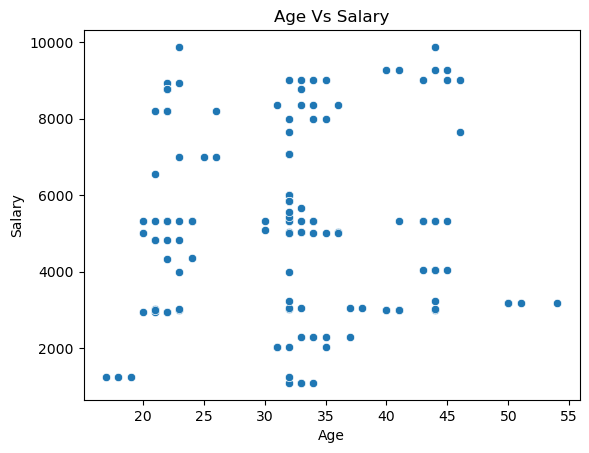

In [52]:
# Plot the chart with age and salary
# Scatter Plot

sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Age Vs Salary')
plt.show()

People Count by City:

City
Mumbai        36
Calcutta      31
Chennai       13
Delhi         13
Cochin        13
Noida          7
Hyderabad      7
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


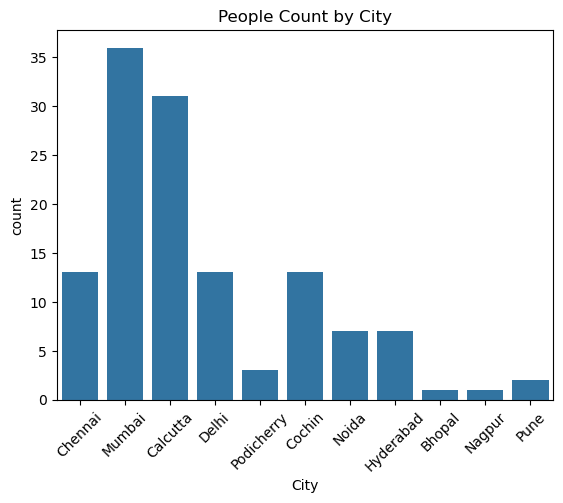

In [68]:
# Count the number of people from each place and it's Vishual representation.

# People Count by City
City_Counts = df['City'].value_counts()
print("People Count by City:\n")
print(City_Counts)

sns.countplot(data=df, x='City')
plt.xticks(rotation=45)
plt.title('People Count by City')
plt.show()

# Data Encoding

In [73]:
# Label Encoding
df_label_encoded = df.copy()
le = LabelEncoder()
df_label_encoded['City_Encoded'] = le.fit_transform(df_label_encoded['City'])

# Printing Encoding
print(df_label_encoded[['City', 'City_Encoded']].head(10))



       City  City_Encoded
0   Chennai             2
1    Mumbai             6
2  Calcutta             1
3     Delhi             4
4    Mumbai             6
5  Calcutta             1
6   Chennai             2
7    Mumbai             6
8  Calcutta             1
9     Delhi             4


In [83]:
# One hot Encoding
# Company
df_one_hot_encoded = pd.get_dummies(df, columns=['Company'])

print(df_one_hot_encoded.filter(like='Company_').head(10))


   Company_CTS  Company_Congnizant  Company_Infosys  Company_Infosys Pvt Lmt  \
0        False               False            False                    False   
1        False               False             True                    False   
2        False               False            False                    False   
3        False               False             True                    False   
4        False               False            False                    False   
5        False               False             True                    False   
6        False               False            False                    False   
7        False               False             True                    False   
8        False               False            False                    False   
9         True               False            False                    False   

   Company_TCS  Company_Tata Consultancy Services  
0         True                              False  
1        False 

# Feature Scaling

In [96]:
# Selecting numerical Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Standard Scaler

scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])

print("Standard Scaled Data(First 5 rows):")
print(df_standard_scaled[numeric_cols].head())


Standard Scaled Data(First 5 rows):
        Age    Salary    Gender
0 -0.948501       NaN -0.535683
1 -0.043841       NaN -0.535683
2  0.408489 -1.175200 -0.535683
3  0.860819 -0.902122 -0.535683
4 -0.677103 -0.512010 -0.535683


In [106]:
# MinMax Scaler

scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])

print("MinMax Scaled Data(First 5 rows):")
print(df_minmax_scaled[numeric_cols].head())
                                                        

MinMax Scaled Data(First 5 rows):
        Age    Salary  Gender
0  0.370370       NaN     0.0
1  0.555556       NaN     0.0
2  0.648148  0.137817     0.0
3  0.740741  0.217480     0.0
4  0.425926  0.331285     0.0


### Observations:
- Most employees are concentrated in the cities of Mumbai and Calcutta.
- Salary and Age had some outliers, which were addressed.
  
 

## Summary
- Cleaned dataset by handling missing values, duplicates, and outliers.
- Categorical columns were encoded using One-Hot and Label Encoding.
- Applied feature scaling using StandardScaler and MinMaxScaler for numerical features.
- The dataset is now preprocessed and ready for machine learning modeling.